In [1]:
import pandas as pd
from resource_consolidation import Resources, Trip, dayint_to_daystr

In [2]:
url = 'https://data.wprdc.org/dataset/healthyride-trip-data'
resource_extension = '/dataset/healthyride-trip-data/resource/'
resource_calling_string = 'https://data.wprdc.org/api/3/action/datastore_search?resource_id='


In [3]:
#create empty container for data 
data_container = Resources(url, resource_extension, resource_calling_string)
#create json string with data from API
json_list = data_container.create_json()

working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=7fe58023-39be-4fa5-a7b7-27d7b0e077a7
of length: 15100
correct length
working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=2c29e217-935d-4d66-909f-9f1b060ed36c
of length: 24313
correct length
working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=102b0be5-aa3f-48b5-9306-e628ae1ae44d
of length: 7224
correct length
working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=7aaac45e-bc45-4219-a856-4d26c1706fdb
of length: 14619
correct length
working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=c2608a60-9282-4e3d-b45d-a0306b75a3c9
of length: 11322
correct length
working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=7f68c23c-7ba3-4e5c-862d-e0cdc7ec2b67
of length: 38007
correct length
working on: https://data.wprdc.org/api/3/action/datastore_search?resource_id=79fc7302-7991-4b5a-b27a-d7c4f21b5b8d
of length: 

In [4]:
print(json_list[0])


{'Trip id': '14321596', 'Bikeid': '70374', 'To station name': 'Boulevard of the Allies & Parkview Ave', 'Usertype': 'Subscriber', 'Stoptime': '10/1/2015 0:32', 'From station name': 'Fifth Ave & S Dithridge St', 'Starttime': '10/1/2015 0:22', 'To station id': '1038', 'Tripduration': '572', '_id': 1, 'From station id': '1035'}


In [5]:
#convert list of dicts to list of objects called "Trips"
Trip_list = []
for dict in json_list:
    li = list(dict.values())
    Trip_list.append(Trip(*li))

In [6]:
#test er out
print(Trip_list[420])
print(Trip_list[420].toname)
print(Trip_list[420].starttime)
print(Trip_list[420].weekday)

Fifth Ave & S Bouquet St
10/2/2015 11:56
4


In [7]:
def sort_by_stations(station_ids, Trip_list):
    master_to = []
    master_from = []
    for station in station_ids:
        master_to += [i for i in Trip_list if i.toid == station]
        master_from += [i for i in Trip_list if i.fromid == station]
    return master_to, master_from



pnc_station_ids = ['49941','49921', '1012']

downtown_station_ids = ['1000', '49701', '1002', '1001', '49691', '49671', '1056', '1003', '49731', '1004', '1006', '49651', '1010']

station_trip_list_to = sort_by_stations(downtown_station_ids, Trip_list)[0]
station_trip_list_from = sort_by_stations(downtown_station_ids, Trip_list)[1]

print(len(station_trip_list_to))
print(len(station_trip_list_from))


109895
105817


In [8]:
class Weekday:
    def __init__(self, weekday, arrivals = [], departures = []):
        self.weekday = weekday
        self.arrivals = arrivals
        self.departures = departures


class Day:
    #date is the day, arrivals is list of arrivals, departures is list of departures
    def __init__ (self, date, arrivals = [], departures = []):
        self.date = date
        self.arrivals = arrivals
        self.departures = departures

In [9]:
def departure_params_todict(list_of_trip_objects):
    daily_dict = {}
    for trip in list_of_trip_objects:
        this_day = trip.starttime.split(" ")[0]
        if this_day not in list(daily_dict.keys()):
            daily_dict[this_day] = [trip.starttime.split(" ")[1]]
        else:
            daily_dict[this_day].append(trip.starttime.split(" ")[1])
    return daily_dict

def arrival_params_todict(list_of_trip_objects):
    daily_dict = {}
    for trip in list_of_trip_objects:
        this_day = trip.stoptime.split(" ")[0]
        if this_day not in list(daily_dict.keys()):
            daily_dict[this_day] = [trip.stoptime.split(" ")[1]]
        else:
            daily_dict[this_day].append(trip.stoptime.split(" ")[1])
    return daily_dict


In [10]:
def weekday_arrivals_todict(list_of_trip_objects):
    weekday_dict = {}
    for trip in list_of_trip_objects:
        this_weekday = trip.weekday
        if this_weekday not in list(weekday_dict.keys()):
            weekday_dict[this_weekday] = [trip.starttime.split(" ")[1]]
        else:
            weekday_dict[this_weekday].append(trip.starttime.split(" ")[1])
    return weekday_dict

def weekday_departures_todict(list_of_trip_objects):
    weekday_dict = {}
    for trip in list_of_trip_objects:
        this_weekday = trip.weekday
        if this_weekday not in list(weekday_dict.keys()):
            weekday_dict[this_weekday] = [trip.stoptime.split(" ")[1]]
        else:
            weekday_dict[this_weekday].append(trip.stoptime.split(" ")[1])
    return weekday_dict



In [14]:
#for use with weekday object
to_dict = weekday_arrivals_todict(station_trip_list_to)
from_dict = weekday_departures_todict(station_trip_list_from)

In [15]:
print(to_dict.keys())

dict_keys([3, 4, 5, 6, 0, 1, 2])


In [13]:
#for use with Day object
to_dict = arrival_params_todict(station_trip_list_to)
from_dict = departure_params_todict(station_trip_list_from)

In [16]:
to_dates = list(to_dict.keys())
from_dates = list(from_dict.keys())

unique_to_arrivals = [i for i in to_dates if i not in from_dates]
unique_to_departures = [i for i in from_dates if i not in to_dates]

shared_dates = [i for i in to_dates if i not in unique_to_arrivals]
print(shared_dates)

[3, 4, 5, 6, 0, 1, 2]


In [17]:
#for use of day objects
Day_object_list = []
for i in shared_dates:
    Day_object_list.append(Day(i, to_dict[i], from_dict[i]))

In [18]:
#for use of weekday object list
weekday_object_list = []

for i in shared_dates:
    weekday_object_list.append(Weekday(i, to_dict[i], from_dict[i]))


In [19]:
#double check which object list you're using

search_index = shared_dates.index(5)

print(weekday_object_list[search_index].weekday)
print(weekday_object_list[search_index].arrivals[:10])
print(weekday_object_list[search_index].departures[:10])

5
['11:33', '20:29', '11:00', '11:04', '12:04', '12:06', '12:44', '14:44', '14:45', '15:05', '15:10', '16:08', '16:11', '16:50', '16:50', '17:22', '17:22', '18:03', '6:51', '11:05', '11:06', '13:19', '13:54', '13:54', '13:57', '21:59', '21:59', '21:59', '10:34', '12:30', '13:36', '14:43', '17:02', '10:18', '10:18', '10:18', '10:19', '10:20', '12:14', '21:08', '10:35', '11:33', '12:01', '12:02', '15:23', '15:25', '17:51', '9:09', '11:05', '11:14', '11:58', '12:00', '10:26', '10:30', '12:11', '15:50', '15:50', '17:29', '17:29', '20:28', '10:14', '15:07', '15:08', '19:07', '0:20', '7:01', '7:42', '12:10', '12:12', '12:27', '12:27', '13:23', '14:16', '14:19', '15:07', '15:07', '15:08', '15:17', '15:24', '15:24', '15:33', '15:37', '15:41', '15:46', '15:47', '15:51', '15:54', '15:56', '15:59', '16:01', '16:09', '17:35', '17:35', '21:44', '21:48', '21:51', '9:10', '15:07', '15:17', '15:17', '15:18', '15:18', '15:26', '15:33', '5:20', '13:15', '13:16', '13:56', '14:24', '14:24', '14:27', '14:3

In [21]:
import matplotlib.pylab as plt
from collections import Counter

def plot_hourly_volume(da, dd):
    listsa = sorted(da.items()) # sorted by key, return a list of tuples
    xa, ya = zip(*listsa) # unpack a list of pairs into two tuples

    listsd = sorted(dd.items()) # sorted by key, return a list of tuples
    xd, yd = zip(*listsd)
    
    plt.plot(xa, ya, "g-")
    plt.plot(xd, yd, 'r-')

    plt.show()

def hourly_volume(li):
    hourly_list = sorted([int(i.split(':')[0]) for i in li])
    counted_vals = Counter(hourly_list)
    return counted_vals


def plot_days_of_wk(shared_dates):
    for i in range(7):
        arrivals_volume = hourly_volume(weekday_object_list[i].arrivals)
        departures_volume = hourly_volume(weekday_object_list[i].departures)
        print(dayint_to_daystr(i))
        plot_hourly_volume(arrivals_volume, departures_volume)

Monday


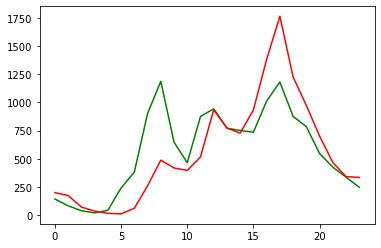

Tuesday


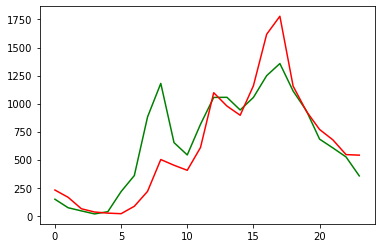

Wednesday


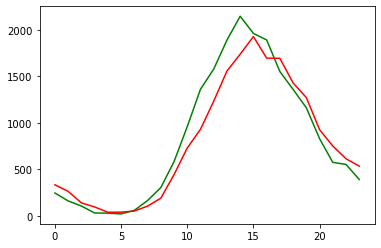

Thursday


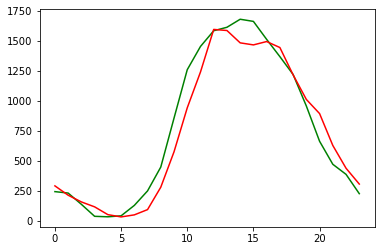

Friday


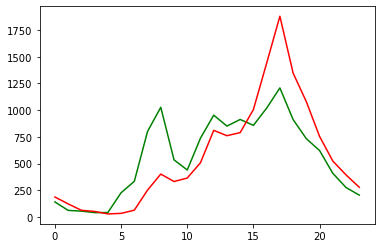

Saturday


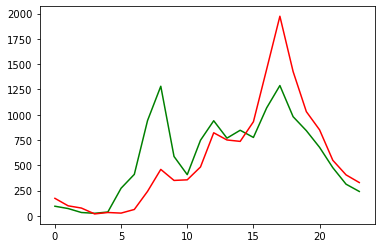

Sunday


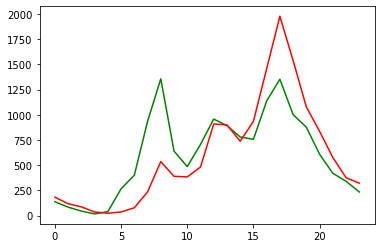

In [22]:
plot_days_of_wk(shared_dates)




Unused Functions Below

In [ ]:
#def daily_parameters (trip_list):
#    daily_dict = {}
#    previous_day = trip_list[0].starttime[:8]
#    i = 0
#    for trip in trip_list:
#        this_day = trip.starttime.split(" ")[0]
#        if previous_day != trip.starttime[:8]:
#            daily_dict[previous_day] = i
#            i = 0
#        else:
#            i += 1
#        previous_day = this_day
#    return daily_dict

In [ ]:
#create json string from json list
#jsonStr = dumps(json_list)
#create dataframe with data from json string
#df = pd.read_json(jsonStr)
#double checking head of dataframe to see if it correctly combined
#print(df.head(n=10))